In [1]:
"""
!pip install Augmentor
!pip install pillow
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install keras
!unzip ./python/images_background.zip
!unzip ./python/images_background_small1.zip
!unzip ./python/images_background_small2.zip
!unzip ./python/images_evaluation.zip
"""

'\n!pip install Augmentor\n!pip install pillow\n!pip install pandas\n!pip install matplotlib\n!pip install numpy\n!pip install keras\n!unzip ./python/images_background.zip\n!unzip ./python/images_background_small1.zip\n!unzip ./python/images_background_small2.zip\n!unzip ./python/images_evaluation.zip\n'

In [1]:
import matplotlib.pyplot as plt
from load_data import load_directory, train_gen, val_gen, quiz_models, LossTracker
from build_models import make_convnet, make_capsnet, train_convnet, train_capsnet, plot_history
from keras.models import load_model

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
batch_size = 20
directory = './images_evaluation/Angelic/'
train, test, labels = load_directory(directory)
loss_tracker = LossTracker()
tg = train_gen(train, labels, batch_size=batch_size, augmentation=True, loss_obj=loss_tracker)
vg = val_gen(test, labels, batch_size=380) #Use the entire validation set here.

In [3]:
input_shape = (105, 105, 1)
n_class = len(labels)
routings = 3
reconstruction_loss = .392

In [5]:
convnet = make_convnet(input_shape, n_class, width=64, dropout=.5)
convnet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 105, 105, 1)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 97, 97, 64)        5248      
_________________________________________________________________
conv2 (Conv2D)               (None, 93, 93, 128)       204928    
_________________________________________________________________
dropout_1 (Dropout)          (None, 93, 93, 128)       0         
_________________________________________________________________
maxp1 (MaxPooling2D)         (None, 46, 46, 128)       0         
_________________________________________________________________
conv3 (Conv2D)               (None, 45, 45, 128)       65664     
_________________________________________________________________
conv4 (Conv2D)               (None, 44, 44, 256)       131328    
__________

In [6]:
history = train_convnet(convnet, tg, vg, directory, verbose=True, loss_obj=loss_tracker)

Epoch 1/200
100/100 [==============================] - 13s 126ms/step - loss: 2.9966 - categorical_accuracy: 0.0525 - val_loss: 2.9957 - val_categorical_accuracy: 0.0500

Epoch 00001: val_categorical_accuracy improved from -inf to 0.05000, saving model to ./models/images_evaluation/Angelic/best_acc.h5

Epoch 00001: val_loss improved from inf to 2.99569, saving model to ./models/images_evaluation/Angelic/best_loss.h5
Epoch 2/200
100/100 [==============================] - 8s 80ms/step - loss: 2.9951 - categorical_accuracy: 0.0510 - val_loss: 2.9957 - val_categorical_accuracy: 0.0500

Epoch 00002: val_categorical_accuracy did not improve from 0.05000

Epoch 00002: val_loss did not improve from 2.99569
Epoch 3/200
100/100 [==============================] - 8s 80ms/step - loss: 2.9955 - categorical_accuracy: 0.0470 - val_loss: 2.9957 - val_categorical_accuracy: 0.0500

Epoch 00003: val_categorical_accuracy did not improve from 0.05000

Epoch 00003: val_loss did not improve from 2.99569
Epoc


Epoch 00021: val_loss did not improve from 2.49999
Epoch 22/200
100/100 [==============================] - 8s 80ms/step - loss: 0.5419 - categorical_accuracy: 0.8620 - val_loss: 2.4857 - val_categorical_accuracy: 0.5211

Epoch 00022: val_categorical_accuracy did not improve from 0.52632

Epoch 00022: val_loss improved from 2.49999 to 2.48569, saving model to ./models/images_evaluation/Angelic/best_loss.h5
Epoch 23/200
100/100 [==============================] - 8s 81ms/step - loss: 0.4788 - categorical_accuracy: 0.8790 - val_loss: 2.4856 - val_categorical_accuracy: 0.5263

Epoch 00023: val_categorical_accuracy did not improve from 0.52632

Epoch 00023: val_loss improved from 2.48569 to 2.48560, saving model to ./models/images_evaluation/Angelic/best_loss.h5
Epoch 24/200
100/100 [==============================] - 8s 81ms/step - loss: 0.4760 - categorical_accuracy: 0.8760 - val_loss: 2.5087 - val_categorical_accuracy: 0.5447

Epoch 00024: val_categorical_accuracy improved from 0.52632 to

100/100 [==============================] - 8s 81ms/step - loss: 0.2375 - categorical_accuracy: 0.9205 - val_loss: 1.9795 - val_categorical_accuracy: 0.7105

Epoch 00068: val_categorical_accuracy did not improve from 0.71842

Epoch 00068: val_loss did not improve from 1.92381
Epoch 69/200
100/100 [==============================] - 8s 81ms/step - loss: 0.2059 - categorical_accuracy: 0.9360 - val_loss: 1.9291 - val_categorical_accuracy: 0.7237

Epoch 00069: val_categorical_accuracy improved from 0.71842 to 0.72368, saving model to ./models/images_evaluation/Angelic/best_acc.h5

Epoch 00069: val_loss did not improve from 1.92381
Epoch 70/200
100/100 [==============================] - 8s 81ms/step - loss: 0.1802 - categorical_accuracy: 0.9400 - val_loss: 1.8999 - val_categorical_accuracy: 0.7421

Epoch 00070: val_categorical_accuracy improved from 0.72368 to 0.74211, saving model to ./models/images_evaluation/Angelic/best_acc.h5

Epoch 00070: val_loss improved from 1.92381 to 1.89987, savin

Epoch 94/200
100/100 [==============================] - 8s 81ms/step - loss: 0.1803 - categorical_accuracy: 0.9470 - val_loss: 1.8105 - val_categorical_accuracy: 0.7711

Epoch 00094: val_categorical_accuracy improved from 0.76316 to 0.77105, saving model to ./models/images_evaluation/Angelic/best_acc.h5

Epoch 00094: val_loss did not improve from 1.74534
Epoch 95/200
100/100 [==============================] - 8s 81ms/step - loss: 0.1775 - categorical_accuracy: 0.9445 - val_loss: 1.8264 - val_categorical_accuracy: 0.7421

Epoch 00095: val_categorical_accuracy did not improve from 0.77105

Epoch 00095: val_loss did not improve from 1.74534
Epoch 96/200
100/100 [==============================] - 8s 80ms/step - loss: 0.1762 - categorical_accuracy: 0.9500 - val_loss: 1.8530 - val_categorical_accuracy: 0.7500

Epoch 00096: val_categorical_accuracy did not improve from 0.77105

Epoch 00096: val_loss did not improve from 1.74534
Epoch 97/200
100/100 [==============================] - 8s 80ms/s

100/100 [==============================] - 8s 80ms/step - loss: 0.1110 - categorical_accuracy: 0.9680 - val_loss: 1.7518 - val_categorical_accuracy: 0.7737

Epoch 00121: val_categorical_accuracy did not improve from 0.77632

Epoch 00121: val_loss did not improve from 1.73015
Epoch 122/200
100/100 [==============================] - 8s 80ms/step - loss: 0.1176 - categorical_accuracy: 0.9660 - val_loss: 1.7437 - val_categorical_accuracy: 0.7632

Epoch 00122: val_categorical_accuracy did not improve from 0.77632

Epoch 00122: val_loss did not improve from 1.73015
Epoch 123/200
100/100 [==============================] - 8s 81ms/step - loss: 0.1209 - categorical_accuracy: 0.9580 - val_loss: 1.7530 - val_categorical_accuracy: 0.7526

Epoch 00123: val_categorical_accuracy did not improve from 0.77632

Epoch 00123: val_loss did not improve from 1.73015
Epoch 124/200
100/100 [==============================] - 8s 81ms/step - loss: 0.1126 - categorical_accuracy: 0.9660 - val_loss: 1.7348 - val_cat


Epoch 00147: val_categorical_accuracy did not improve from 0.78158

Epoch 00147: val_loss did not improve from 1.64052
Epoch 148/200
100/100 [==============================] - 8s 81ms/step - loss: 0.0732 - categorical_accuracy: 0.9770 - val_loss: 1.6408 - val_categorical_accuracy: 0.7763

Epoch 00148: val_categorical_accuracy did not improve from 0.78158

Epoch 00148: val_loss did not improve from 1.64052
Epoch 149/200
100/100 [==============================] - 8s 81ms/step - loss: 0.0899 - categorical_accuracy: 0.9725 - val_loss: 1.6523 - val_categorical_accuracy: 0.7658

Epoch 00149: val_categorical_accuracy did not improve from 0.78158

Epoch 00149: val_loss did not improve from 1.64052
Epoch 150/200
100/100 [==============================] - 8s 81ms/step - loss: 0.0951 - categorical_accuracy: 0.9720 - val_loss: 1.6508 - val_categorical_accuracy: 0.7632

Epoch 00150: val_categorical_accuracy did not improve from 0.78158

Epoch 00150: val_loss did not improve from 1.64052
Epoch 151/

100/100 [==============================] - 8s 80ms/step - loss: 0.0702 - categorical_accuracy: 0.9795 - val_loss: 1.5817 - val_categorical_accuracy: 0.7737

Epoch 00175: val_categorical_accuracy did not improve from 0.78158

Epoch 00175: val_loss improved from 1.59035 to 1.58170, saving model to ./models/images_evaluation/Angelic/best_loss.h5
Epoch 176/200
100/100 [==============================] - 8s 80ms/step - loss: 0.0817 - categorical_accuracy: 0.9790 - val_loss: 1.6110 - val_categorical_accuracy: 0.7658

Epoch 00176: val_categorical_accuracy did not improve from 0.78158

Epoch 00176: val_loss did not improve from 1.58170
Epoch 177/200
100/100 [==============================] - 8s 81ms/step - loss: 0.1058 - categorical_accuracy: 0.9745 - val_loss: 1.6107 - val_categorical_accuracy: 0.7711

Epoch 00177: val_categorical_accuracy did not improve from 0.78158

Epoch 00177: val_loss did not improve from 1.58170
Epoch 178/200
100/100 [==============================] - 8s 80ms/step - los

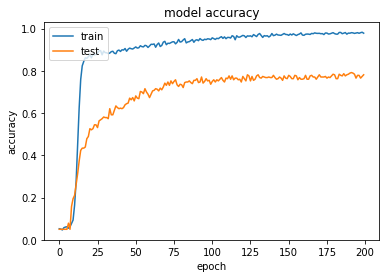

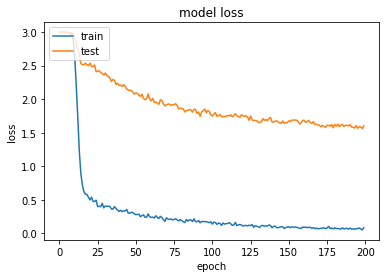

In [8]:
plot_history(history)

In [9]:
results1, results2, results3 = quiz_models(directory, test, labels)


quizzing best accuracy model...

Quiz results: 301 out of 380 correct.
Quiz accuracy score: 0.792. Error rate: 0.208
Classification results: 295 out of 380 correct.
Classification accuracy score: 0.776. Error rate: 0.224

quizzing best loss model...

Quiz results: 294 out of 380 correct.
Quiz accuracy score: 0.774. Error rate: 0.226
Classification results: 296 out of 380 correct.
Classification accuracy score: 0.779. Error rate: 0.221

quizzing best overfit model...

Quiz results: 297 out of 380 correct.
Quiz accuracy score: 0.782. Error rate: 0.218
Classification results: 295 out of 380 correct.
Classification accuracy score: 0.776. Error rate: 0.224


In [4]:
capsnet, eval_model, manipulate_model = make_capsnet(input_shape, n_class, routings, reconstruction_loss)

Instructions for updating:
dim is deprecated, use axis instead


In [5]:
loss_tracker = LossTracker()
tg = train_gen(train, labels, batch_size=batch_size, augmentation=True, loss_obj=loss_tracker)
vg = val_gen(test, labels, batch_size=batch_size)
history = train_capsnet(capsnet, tg, vg, directory, verbose=True, loss_obj=loss_tracker)

Epoch 1/100
100/100 [==============================] - 170s 2s/step - loss: 0.9052 - capsnet_loss: 0.8504 - decoder_loss: 0.1398 - capsnet_acc: 0.1745 - val_loss: 0.8486 - val_capsnet_loss: 0.8100 - val_decoder_loss: 0.0986 - val_capsnet_acc: 0.0447

Epoch 00001: val_capsnet_acc improved from -inf to 0.04474, saving model to ./models/images_evaluation/Angelic/best_acc_caps.h5

Epoch 00001: val_loss improved from inf to 0.84864, saving model to ./models/images_evaluation/Angelic/best_loss_caps.h5
Epoch 2/100
 15/100 [===>..........................] - ETA: 2:01 - loss: 0.8426 - capsnet_loss: 0.8100 - decoder_loss: 0.0831 - capsnet_acc: 0.1567

KeyboardInterrupt: 

In [ ]:
results_caps1, results_caps2, results_caps3 = quiz_models(directory, test, labels, capsnet=True)